In [138]:
import torch
import torch.nn
import torchvision
import torch.nn.functional as F
from torch.autograd import Variable

#Visualization + tools
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from mpl_toolkits.axes_grid1 import AxesGrid

Загружаем и инициализируем изображение

C:\Users\Victor\Anaconda2\envs\test\lib\site-packages\scikit_image-0.13.1-py3.6-win-amd64.egg\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


2.6399999999999997 -2.1179039301310043 (224, 224, 3)


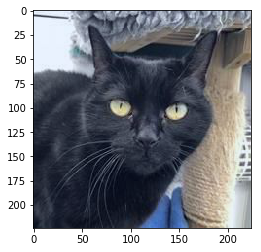

In [156]:
img = imread('https://s-media-cache-ak0.pinimg.com/originals/68/41/86/6841860bbd9ef95ea4fc0426df1a931c.jpg')
#img = imread('https://s-media-cache-ak0.pinimg.com/236x/2a/d2/9b/2ad29ba154d4d70f3c9b379844c98558--you-think-do-you.jpg')
#img = imread('https://rabbits.life/wp-content/uploads/2013/06/Background-rabbits-life-little.jpg')
img =img.astype(np.float32)/255.
img = resize(img,(224,224))
nimage = (img - np.array([0.485, 0.456, 0.406]))/np.array([0.229, 0.224, 0.225])
print(nimage.max(), nimage.min(), nimage.shape)
plt.imshow((nimage-np.min(nimage))/(np.max(nimage)-np.min(nimage)))

In [110]:
import requests
labels = {int(key):value for (key, value)
          in requests.get('https://s3.amazonaws.com/outcome-blog/imagenet/labels.json').json().items()}

In [90]:
model = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\Victor/.torch\models\alexnet-owt-4df8aa71.pth
99.1%

In [140]:
x = Variable(torch.from_numpy(np.expand_dims(nimage.transpose(2,0,1),0)).float())
model.eval()
output = model(x)
print(labels[output.data.numpy().argmax()])

Egyptian cat


Нарисовать фильтры первого уровня

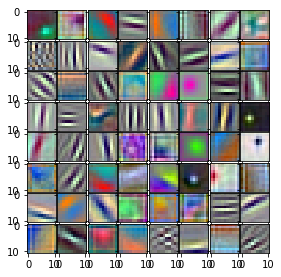

In [161]:
def draw_tensor(tensor,nx,ny):
    fig = plt.figure(figsize = (20, 20))
    grid = AxesGrid(fig, 141,  # similar to subplot(141)
                    nrows_ncols=(nx, ny))
    
    for i in range(tensor.shape[1]):
        im = grid[i].imshow(tensor.data[0,i].numpy(), interpolation="nearest")
    plt.show()
    
def draw_filters(tensor,nx,ny):
    nr = np.sqrt(tensor.shape[0])
    nr = np.int(nr)
    fig = plt.figure(figsize = (20, 20))
    grid = AxesGrid(fig, 141,  # similar to subplot(141)
                    nrows_ncols=(nx,ny))
    
    for i in range(tensor.shape[0]):
        filterx = tensor.data[i].numpy().transpose(1,2,0)
        filterx = (filterx-np.min(filterx))/(np.max(filterx)-np.min(filterx))
        im = grid[i].imshow(filterx, interpolation="nearest")
    plt.show()
    
params = list(model.features[0].parameters())
draw_filters(params[0],8,8)

Нарисовать результаты применения фильтров 1 свертки 

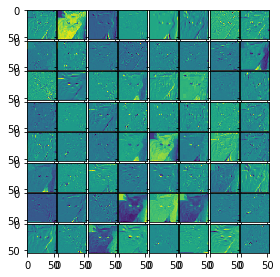

In [164]:
draw_tensor(model.features[0](x),8,8)

Нарисовать результаты применения фильтров 2
свертки 

torch.Size([1, 192, 27, 27])


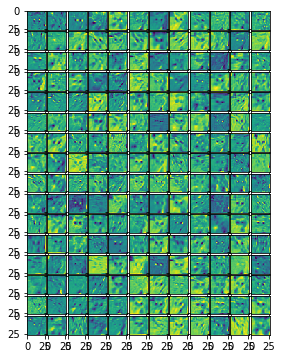

In [159]:
a = model.features[0](x)
a = model.features[1](a)
a = model.features[2](a)
a = model.features[3](a)
print(a.shape)
draw_tensor(a,16,12)